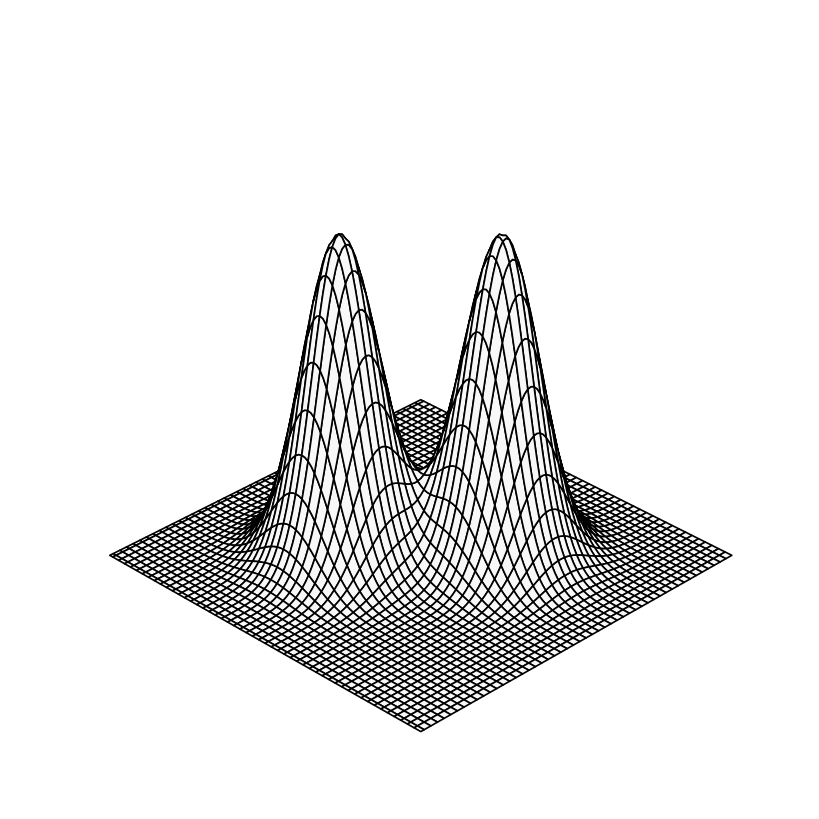

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define two 2D Gaussian components
mu1 = np.array([1.0, 1.0])
mu2 = np.array([-1.0, -1.0])
cov1 = np.array([[0.5, 0.0],
                 [0.0, 0.5]])
cov2 = np.array([[0.5, 0.0],
                 [0.0, 0.5]])

# Precompute determinants and inverses for each covariance matrix
det_cov1 = np.linalg.det(cov1)
inv_cov1 = np.linalg.inv(cov1)

det_cov2 = np.linalg.det(cov2)
inv_cov2 = np.linalg.inv(cov2)

def multivariate_gaussian_pdf(x, mu, inv_cov, det_cov):
    """
    Compute the PDF of a 2D Gaussian with mean mu and covariance from inv_cov, det_cov.
    x is a 2-element array [x1, x2].
    """
    diff = x - mu
    exponent = -0.5 * diff @ inv_cov @ diff
    norm_const = 1.0 / (2 * np.pi * np.sqrt(det_cov))
    return norm_const * np.exp(exponent)

# Build a grid over which to evaluate the mixture density
grid_size = 100  # number of points along each axis
x_vals = np.linspace(-4, 4, grid_size)
y_vals = np.linspace(-4, 4, grid_size)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.zeros_like(X)

# Compute mixture density at each grid point
for i in range(grid_size):
    for j in range(grid_size):
        point = np.array([X[i, j], Y[i, j]])
        p1 = multivariate_gaussian_pdf(point, mu1, inv_cov1, det_cov1)
        p2 = multivariate_gaussian_pdf(point, mu2, inv_cov2, det_cov2)
        # Mixture: 0.5 weight for each component
        Z[i, j] = 0.5 * p1 + 0.5 * p2

# Create 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface( X, Y, Z, color='#f8f8f8', edgecolor='k', linewidth=1.2, antialiased=True, shade=False)
# Style adjustments
# Make each axis pane fully transparent
ax.xaxis.pane.set_facecolor((1, 1, 1, 0))
ax.yaxis.pane.set_facecolor((1, 1, 1, 0))
ax.zaxis.pane.set_facecolor((1, 1, 1, 0))
# Turn off grid lines
ax.grid(False)

# Remove tick marks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Hide the 3D axes “box” frame
ax.set_axis_off()
ax.view_init(elev=30, azim=135)  # adjust elevation and azimuth for a good angle


# force‐fill the entire figure
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.show()
